In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [70]:
column_list = "label,channel_id,coin,timestamp,length,coin_seq,feature_seq,pre_1h_return,pre_1h_price,pre_1h_price_avg,pre_1h_volume,pre_1h_volume_avg,pre_1h_volume_sum,pre_1h_volume_tb,pre_1h_volume_quote,pre_1h_volume_quote_tb,pre_3h_return,pre_3h_price,pre_3h_price_avg,pre_3h_volume,pre_3h_volume_avg,pre_3h_volume_sum,pre_3h_volume_tb,pre_3h_volume_tb_avg,pre_3h_volume_tb_sum,pre_3h_volume_quote,pre_3h_volume_quote_avg,pre_3h_volume_quote_sum,pre_3h_volume_quote_tb,pre_3h_volume_quote_tb_avg,pre_3h_volume_quote_tb_sum,pre_6h_return,pre_6h_price,pre_6h_price_avg,pre_6h_volume,pre_6h_volume_avg,pre_6h_volume_sum,pre_6h_volume_tb,pre_6h_volume_tb_avg,pre_6h_volume_tb_sum,pre_6h_volume_quote,pre_6h_volume_quote_avg,pre_6h_volume_quote_sum,pre_6h_volume_quote_tb,pre_6h_volume_quote_tb_avg,pre_6h_volume_quote_tb_sum,pre_12h_return,pre_12h_price,pre_12h_price_avg,pre_12h_volume,pre_12h_volume_avg,pre_12h_volume_sum,pre_12h_volume_tb,pre_12h_volume_tb_avg,pre_12h_volume_tb_sum,pre_12h_volume_quote,pre_12h_volume_quote_avg,pre_12h_volume_quote_sum,pre_12h_volume_quote_tb,pre_12h_volume_quote_tb_avg,pre_12h_volume_quote_tb_sum,pre_24h_return,pre_24h_price,pre_24h_price_avg,pre_24h_volume,pre_24h_volume_avg,pre_24h_volume_sum,pre_24h_volume_tb,pre_24h_volume_tb_avg,pre_24h_volume_tb_sum,pre_24h_volume_quote,pre_24h_volume_quote_avg,pre_24h_volume_quote_sum,pre_24h_volume_quote_tb,pre_24h_volume_quote_tb_avg,pre_24h_volume_quote_tb_sum,pre_36h_return,pre_36h_price,pre_36h_price_avg,pre_36h_volume,pre_36h_volume_avg,pre_36h_volume_sum,pre_36h_volume_tb,pre_36h_volume_tb_avg,pre_36h_volume_tb_sum,pre_36h_volume_quote,pre_36h_volume_quote_avg,pre_36h_volume_quote_sum,pre_36h_volume_quote_tb,pre_36h_volume_quote_tb_avg,pre_36h_volume_quote_tb_sum,pre_48h_return,pre_48h_price,pre_48h_price_avg,pre_48h_volume,pre_48h_volume_avg,pre_48h_volume_sum,pre_48h_volume_tb,pre_48h_volume_tb_avg,pre_48h_volume_tb_sum,pre_48h_volume_quote,pre_48h_volume_quote_avg,pre_48h_volume_quote_sum,pre_48h_volume_quote_tb,pre_48h_volume_quote_tb_avg,pre_48h_volume_quote_tb_sum,pre_60h_return,pre_60h_price,pre_60h_price_avg,pre_60h_volume,pre_60h_volume_avg,pre_60h_volume_sum,pre_60h_volume_tb,pre_60h_volume_tb_avg,pre_60h_volume_tb_sum,pre_60h_volume_quote,pre_60h_volume_quote_avg,pre_60h_volume_quote_sum,pre_60h_volume_quote_tb,pre_60h_volume_quote_tb_avg,pre_60h_volume_quote_tb_sum,pre_72h_return,pre_72h_price,pre_72h_price_avg,pre_72h_volume,pre_72h_volume_avg,pre_72h_volume_sum,pre_72h_volume_tb,pre_72h_volume_tb_avg,pre_72h_volume_tb_sum,pre_72h_volume_quote,pre_72h_volume_quote_avg,pre_72h_volume_quote_sum,pre_72h_volume_quote_tb,pre_72h_volume_quote_tb_avg,pre_72h_volume_quote_tb_sum,pre_3d_market_cap_usd,pre_3d_market_cap_btc,pre_3d_price_usd,pre_3d_price_btc,pre_3d_volume_usd,pre_3d_volume_btc,pre_3d_twitter_index,pre_3d_reddit_index,pre_3d_alexa_index".split(",")
test_df = pd.read_csv("../FeatGeneration/test_sample.csv", names=column_list)
train_df = pd.read_csv("../FeatGeneration/train_sample.csv", names=column_list)

In [88]:
test_df_0 = test_df[test_df["label"]==0]
test_df_0["pre_72h_return"].mean()

0.024783715863927958

In [89]:
test_df_1 = test_df[test_df["label"]==1]
test_df_1["pre_72h_return"].mean()

0.1608723749344157

In [57]:
for c in column_list[7:]:
    print(c,":", test_df.loc[64297, c])

pre_1h_return : 0.1861506544674234
pre_1h_price : 0.325681075406604
pre_1h_price_avg : 0.325681075406604
pre_1h_volume : 22.44488271924212
pre_1h_volume_avg : 22.44488271924212
pre_1h_volume_sum : 22.44488271924212
pre_1h_volume_tb : 21.45787285168372
pre_1h_volume_quote : 4.227418347611336
pre_1h_volume_quote_tb : 3.2244425438422875
pre_3h_return : 0.1942251113161286
pre_3h_price : 0.2736182235195997
pre_3h_price_avg : 0.2912896792510703
pre_3h_volume : 11.227676104588555
pre_3h_volume_avg : 20.8933038271436
pre_3h_volume_sum : 22.47826627848237
pre_3h_volume_tb : 9.763378375104198
pre_3h_volume_tb_avg : 19.91813207326622
pre_3h_volume_tb_sum : 21.503094476907755
pre_3h_volume_quote : -3.2302772709066288
pre_3h_volume_quote_avg : 2.685473191958177
pre_3h_volume_quote_sum : 4.255406506978451
pre_3h_volume_quote_tb : -3.287979246457476
pre_3h_volume_quote_tb_avg : 1.7075976703370417
pre_3h_volume_quote_tb_sum : 3.26280821109038
pre_6h_return : 0.2012495168384387
pre_6h_price : 0.2725730

In [115]:
X_train = train_df[column_list[7:]].values
y_train = train_df.label.values

X_test = test_df[column_list[7:]].values
y_test = test_df.label.values

In [116]:
print(X_train.shape)
print(X_test.shape)

(132314, 138)
(64299, 138)


In [117]:
gbdt_model = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300, min_samples_leaf=20,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10)
gbdt_model.fit(X_train, y_train)
y_pred_proba = gbdt_model.predict_proba(X_test)

GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=20, min_samples_split=300,
                           random_state=10, subsample=0.8)

In [118]:
y_pred_proba = gbdt_model.predict_proba(X_test)

In [119]:
feat_import = gbdt_model.feature_importances_
print()

[0.01967892 0.01506138 0.00410471 0.00660229 0.00500735 0.00199945
 0.00398035 0.00908383 0.00291293 0.00836365 0.00524554 0.00346124
 0.00224269 0.00139799 0.00515268 0.00388349 0.00167536 0.00975686
 0.01088649 0.00632056 0.00292103 0.0069453  0.0048581  0.0132878
 0.01628015 0.0231176  0.00526264 0.01011834 0.00218009 0.00670028
 0.00285985 0.00531311 0.00197473 0.00829013 0.0028369  0.01085915
 0.008423   0.0020084  0.00796134 0.01221032 0.003772   0.00718218
 0.00351327 0.00687495 0.00290917 0.002595   0.00275681 0.00461041
 0.0096682  0.00487395 0.00624266 0.00433634 0.00332081 0.00313281
 0.01264947 0.00764391 0.00384673 0.00296032 0.0018232  0.00201155
 0.00608228 0.00109584 0.00301694 0.00748953 0.00132812 0.00196233
 0.00727332 0.00619642 0.00420537 0.00627301 0.00793732 0.01239082
 0.00298957 0.00383443 0.00340464 0.00583289 0.00473334 0.00184145
 0.00666779 0.00411064 0.00435675 0.00677339 0.00635491 0.00752479
 0.01227382 0.00256514 0.00358248 0.00534759 0.00289963 0.00240

In [80]:
column_list[7:]

['pre_1h_return',
 'pre_1h_price',
 'pre_1h_price_avg',
 'pre_1h_volume',
 'pre_1h_volume_avg',
 'pre_1h_volume_sum',
 'pre_1h_volume_tb',
 'pre_1h_volume_quote',
 'pre_1h_volume_quote_tb',
 'pre_3h_return',
 'pre_3h_price',
 'pre_3h_price_avg',
 'pre_3h_volume',
 'pre_3h_volume_avg',
 'pre_3h_volume_sum',
 'pre_3h_volume_tb',
 'pre_3h_volume_tb_avg',
 'pre_3h_volume_tb_sum',
 'pre_3h_volume_quote',
 'pre_3h_volume_quote_avg',
 'pre_3h_volume_quote_sum',
 'pre_3h_volume_quote_tb',
 'pre_3h_volume_quote_tb_avg',
 'pre_3h_volume_quote_tb_sum',
 'pre_6h_return',
 'pre_6h_price',
 'pre_6h_price_avg',
 'pre_6h_volume',
 'pre_6h_volume_avg',
 'pre_6h_volume_sum',
 'pre_6h_volume_tb',
 'pre_6h_volume_tb_avg',
 'pre_6h_volume_tb_sum',
 'pre_6h_volume_quote',
 'pre_6h_volume_quote_avg',
 'pre_6h_volume_quote_sum',
 'pre_6h_volume_quote_tb',
 'pre_6h_volume_quote_tb_avg',
 'pre_6h_volume_quote_tb_sum',
 'pre_12h_return',
 'pre_12h_price',
 'pre_12h_price_avg',
 'pre_12h_volume',
 'pre_12h_volume

In [120]:
y_pred_proba_1 = y_pred_proba[:,1]
y_pred = np.zeros_like(y_pred_proba_1)
y_pred[np.where(y_pred_proba_1>=0.25)[0]] = 1
print(classification_report(y_test.astype(int), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64099
           1       0.27      0.15      0.19       200

    accuracy                           1.00     64299
   macro avg       0.64      0.57      0.60     64299
weighted avg       1.00      1.00      1.00     64299



In [121]:
y_pred_proba_1 = y_pred_proba[:,1]
y_pred = np.zeros_like(y_pred_proba_1)
y_pred[np.where(y_pred_proba_1>=0.45)[0]] = 1
print(classification_report(y_test.astype(int), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64099
           1       0.45      0.15      0.23       200

    accuracy                           1.00     64299
   macro avg       0.73      0.57      0.61     64299
weighted avg       1.00      1.00      1.00     64299



In [123]:
from sklearn import metrics

In [124]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba_1, pos_label=1)
metrics.auc(fpr, tpr)

0.9547929764894929

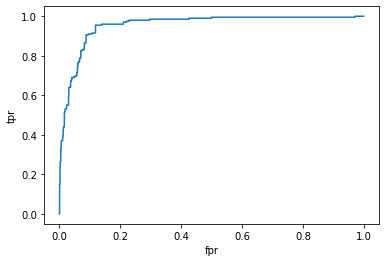

In [127]:
import matplotlib.pyplot as plt
# plt.figure("Recall-Threshold Curve")
# plt.title("Recall-Threshold Curve")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.plot(fpr, tpr)

In [126]:
fpr

array([0.00000000e+00, 1.09206072e-04, 1.40407807e-04, ...,
       9.99890794e-01, 9.99937597e-01, 1.00000000e+00])

In [122]:
y_pred_proba_1 = y_pred_proba[:,1]
y_pred = np.zeros_like(y_pred_proba_1)
y_pred[np.where(y_pred_proba_1>=0.3)[0]] = 1
print(classification_report(y_test.astype(int), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64099
           1       0.32      0.15      0.20       200

    accuracy                           1.00     64299
   macro avg       0.66      0.57      0.60     64299
weighted avg       1.00      1.00      1.00     64299



In [90]:
y_pred_proba_1

array([1.06638462e-04, 1.38800818e-04, 8.42210769e-05, ...,
       3.80999631e-04, 1.80077749e-04, 4.58299599e-05])

In [91]:
from sklearn.metrics import precision_recall_curve 
precision, recall, thresholds = precision_recall_curve(y_test.astype(int), y_pred_proba[:,1])

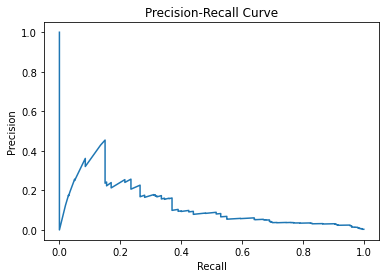

In [92]:
import matplotlib.pyplot as plt
plt.figure("P-R Curve")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(recall, precision)

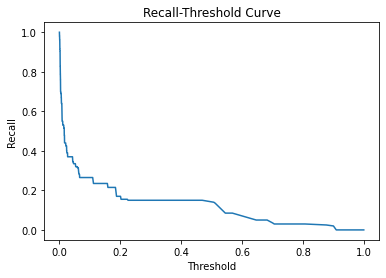

In [93]:
import matplotlib.pyplot as plt
plt.figure("Recall-Threshold Curve")
plt.title("Recall-Threshold Curve")
plt.xlabel("Threshold")
plt.ylabel("Recall")
plt.plot(thresholds, recall[:-1])

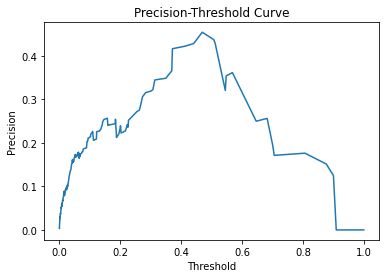

In [94]:
import matplotlib.pyplot as plt
plt.figure("Precision-Threshold Curve")
plt.title("Precision-Threshold Curve")
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.plot(thresholds, precision[:-1])

In [105]:
from sklearn.metrics import precision_recall_curve 
precision, recall, thresholds = precision_recall_curve(y_test.astype(int), y_pred_proba[:,1])

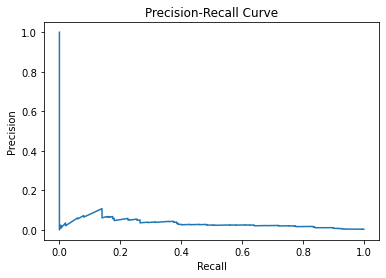

In [106]:
import matplotlib.pyplot as plt
plt.figure("P-R Curve")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(recall, precision)

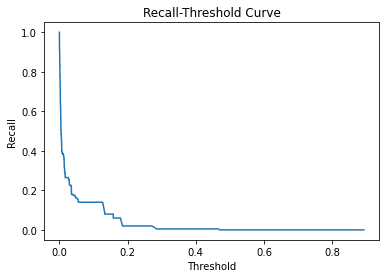

In [107]:
import matplotlib.pyplot as plt
plt.figure("Recall-Threshold Curve")
plt.title("Recall-Threshold Curve")
plt.xlabel("Threshold")
plt.ylabel("Recall")
plt.plot(thresholds, recall[:-1])

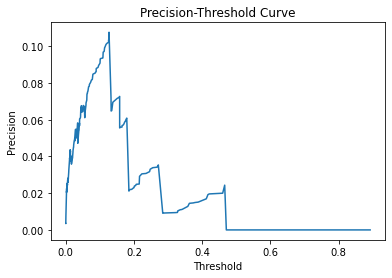

In [108]:
import matplotlib.pyplot as plt
plt.figure("Precision-Threshold Curve")
plt.title("Precision-Threshold Curve")
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.plot(thresholds, precision[:-1])

In [114]:
y_pred_proba_1 = y_pred_proba[:,1]
y_pred = np.zeros_like(y_pred_proba_1)
y_pred[np.where(y_pred_proba_1>=0.2)[0]] = 1
print(classification_report(y_test.astype(int), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64099
           1       0.02      0.02      0.02       200

    accuracy                           0.99     64299
   macro avg       0.51      0.51      0.51     64299
weighted avg       0.99      0.99      0.99     64299



In [128]:
# 混合式进行 training/testing

In [129]:
hybrid_df = pd.concat([train_df, test_df], axis=0)

In [131]:
# cleaned data
X = hybrid_df[column_list[7:]].values
y = hybrid_df.label.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [133]:
gbdt_model = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300, min_samples_leaf=20,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10)
gbdt_model.fit(X_train, y_train)
y_pred_proba = gbdt_model.predict_proba(X_test)

In [134]:
y_pred_proba_1 = y_pred_proba[:,1]
y_pred = np.zeros_like(y_pred_proba_1)
y_pred[np.where(y_pred_proba_1>=0.25)[0]] = 1
print(classification_report(y_test.astype(int), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58682
           1       0.86      0.71      0.78       302

    accuracy                           1.00     58984
   macro avg       0.93      0.85      0.89     58984
weighted avg       1.00      1.00      1.00     58984



In [136]:
from sklearn.metrics import precision_recall_curve 
precision, recall, thresholds = precision_recall_curve(y_test.astype(int), y_pred_proba[:,1])

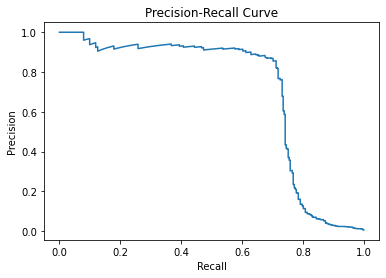

In [137]:
import matplotlib.pyplot as plt
plt.figure("P-R Curve")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(recall, precision)

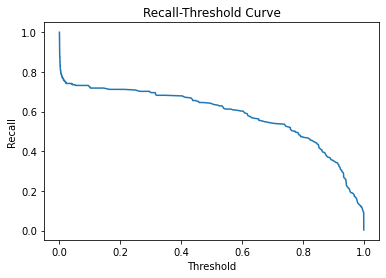

In [138]:
import matplotlib.pyplot as plt
plt.figure("Recall-Threshold Curve")
plt.title("Recall-Threshold Curve")
plt.xlabel("Threshold")
plt.ylabel("Recall")
plt.plot(thresholds, recall[:-1])

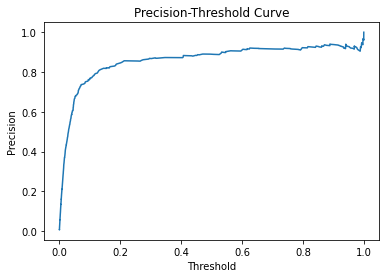

In [139]:
import matplotlib.pyplot as plt
plt.figure("Precision-Threshold Curve")
plt.title("Precision-Threshold Curve")
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.plot(thresholds, precision[:-1])

In [140]:
# 插点式

In [143]:
np.min(hybrid_df.timestamp.values)

1546353004000

In [144]:
np.max(hybrid_df.timestamp.values)

1642518014000

In [152]:
test_df_list = []
train_df_list = []

timestamp_list = list(range(1546353004000,1642518014000+1, 9616501000))
for i in range(len(timestamp_list)-1):
    low = timestamp_list[i]
    high = timestamp_list[i+1]
    
    select_df = hybrid_df[hybrid_df.timestamp>= low]
    select_df = select_df[select_df.timestamp<high]
    
    split_ts = low + (high - low) * 0.7
    
    train_df_list.append(select_df[select_df.timestamp<split_ts])
    test_df_list.append(select_df[select_df.timestamp>=split_ts])
    

In [167]:
test_df = pd.concat(test_df_list, axis=0)
train_df = pd.concat(train_df_list, axis=0)

In [172]:
train_df.label.value_counts()

0    138676
1       681
Name: label, dtype: int64

In [170]:
test_df.label.value_counts()

0    56679
1      267
Name: label, dtype: int64

In [173]:
X_train = train_df[column_list[7:]].values
y_train = train_df.label.values

X_test = test_df[column_list[7:]].values
y_test = test_df.label.values

In [175]:
gbdt_model = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300, min_samples_leaf=20,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10)
gbdt_model.fit(X_train, y_train)
y_pred_proba = gbdt_model.predict_proba(X_test)

In [176]:
y_pred_proba_1 = y_pred_proba[:,1]
y_pred = np.zeros_like(y_pred_proba_1)
y_pred[np.where(y_pred_proba_1>=0.25)[0]] = 1
print(classification_report(y_test.astype(int), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56679
           1       0.33      0.13      0.18       267

    accuracy                           0.99     56946
   macro avg       0.66      0.56      0.59     56946
weighted avg       0.99      0.99      0.99     56946



In [188]:
y_pred_proba_1 = y_pred_proba[:,1]
y_pred = np.zeros_like(y_pred_proba_1)
y_pred[np.where(y_pred_proba_1>=0.31)[0]] = 1
print(classification_report(y_test.astype(int), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56679
           1       0.34      0.12      0.17       267

    accuracy                           0.99     56946
   macro avg       0.67      0.56      0.59     56946
weighted avg       0.99      0.99      0.99     56946



In [179]:
y_pred_proba_1 = y_pred_proba[:,1]
y_pred = np.zeros_like(y_pred_proba_1)
y_pred[np.where(y_pred_proba_1>=0.4)[0]] = 1
print(classification_report(y_test.astype(int), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56679
           1       0.42      0.10      0.16       267

    accuracy                           1.00     56946
   macro avg       0.71      0.55      0.58     56946
weighted avg       0.99      1.00      0.99     56946



In [180]:
from sklearn.metrics import precision_recall_curve 
precision, recall, thresholds = precision_recall_curve(y_test.astype(int), y_pred_proba[:,1])

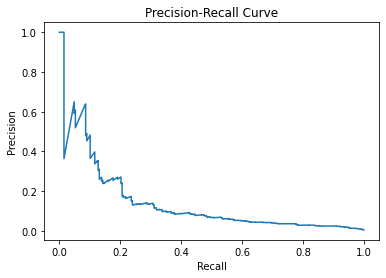

In [181]:
import matplotlib.pyplot as plt
plt.figure("P-R Curve")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(recall, precision)

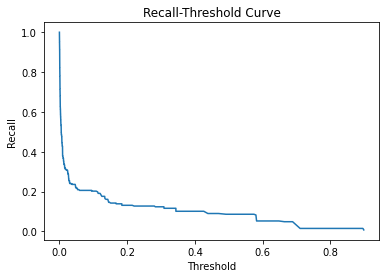

In [182]:
import matplotlib.pyplot as plt
plt.figure("Recall-Threshold Curve")
plt.title("Recall-Threshold Curve")
plt.xlabel("Threshold")
plt.ylabel("Recall")
plt.plot(thresholds, recall[:-1])

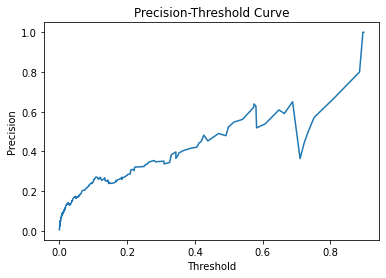

In [183]:
import matplotlib.pyplot as plt
plt.figure("Precision-Threshold Curve")
plt.title("Precision-Threshold Curve")
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.plot(thresholds, precision[:-1])